In [ ]:
import json
import gzip
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

# Reviews data

In [ ]:
#http://deepyeti.ucsd.edu/jianmo/amazon/index.html

!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Luxury_Beauty.json.gz

--2020-12-02 21:00:45--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Luxury_Beauty.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73193215 (70M) [application/octet-stream]
Saving to: ‘Luxury_Beauty.json.gz.1’

Luxury_Beauty.json. 100%[===================>]  69.80M  43.0MB/s    in 1.6s    

2020-12-02 21:00:47 (43.0 MB/s) - ‘Luxury_Beauty.json.gz.1’ saved [73193215/73193215]



In [ ]:
### load the data

data = []
with gzip.open('Luxury_Beauty.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

574628
{'overall': 2.0, 'vote': '3', 'verified': True, 'reviewTime': '06 15, 2010', 'reviewerID': 'A1Q6MUU0B2ZDQG', 'asin': 'B00004U9V2', 'reviewerName': 'D. Poston', 'reviewText': "I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work.  The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.", 'summary': "dispensers don't work", 'unixReviewTime': 1276560000}


In [ ]:
# convert list into pandas dataframe

reviews = pd.DataFrame.from_dict(data)

print(len(reviews))

574628


**Overview of the columns:**
*   reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B 
*   asin - ID of the product, e.g. 0000013714 
*   reviewerName - name of the reviewer 
*   vote - helpful votes of the review 
*   style - a disctionary of the product metadata, e.g., "Format" is "Hardcover" 
*   reviewText - text of the review 
*   overall - rating of the product 
*   summary - summary of the review 
*   unixReviewTime - time of the review (unix time) 
*   reviewTime - time of the review (raw) 
*   image - images that users post after they have received the product 

In [ ]:
reviews.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


Diving into the columns we see a lot of missing values. It might be worth considering to remove the '**vote**', '**style**' and '**image**' column:

In [ ]:
reviews.isnull().sum()

overall                0
vote              470939
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          31
reviewText           400
summary              183
unixReviewTime         0
style             323615
image             567210
dtype: int64

##Meta data

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_Luxury_Beauty.json.gz

--2020-12-02 21:00:58--  http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_Luxury_Beauty.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7390423 (7.0M) [application/octet-stream]
Saving to: ‘meta_Luxury_Beauty.json.gz’

meta_Luxury_Beauty. 100%[===================>]   7.05M  14.3MB/s    in 0.5s    

2020-12-02 21:00:58 (14.3 MB/s) - ‘meta_Luxury_Beauty.json.gz’ saved [7390423/7390423]



In [ ]:
meta = []
with gzip.open('meta_Luxury_Beauty.json.gz') as f:
    for l in f:
        meta.append(json.loads(l.strip()))

In [ ]:
metadata = pd.DataFrame.from_dict(meta)

In [ ]:
metadata.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,B00004U9V2
1,[],,[If you haven't experienced the pleasures of b...,,AHAVA Bath Salts,[],[],,,[],"1,633,549 in Beauty & Personal Care (",[],{' Product Dimensions: ': '3 x 3.5 x ...,Luxury Beauty,,,,B0000531EN
2,[],,"[Rich, black mineral mud, harvested from the b...",,"AHAVA Dead Sea Mineral Mud, 8.5 oz, Pack of 4",[],[https://images-na.ssl-images-amazon.com/image...,,,[],"1,806,710 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '5.1 x 3 x ...,Luxury Beauty,,,,B0000532JH
3,[],,[This liquid soap with convenient pump dispens...,,"Crabtree &amp; Evelyn Hand Soap, Gardeners, 10...",[],[https://images-na.ssl-images-amazon.com/image...,,,[],[],"[B00004U9V2, B00GHX7H0A, B00FRERO7G, B00R68QXC...",{' Product Dimensions: ': '2.6 x 2.6 ...,Luxury Beauty,,,$15.99,B00005A77F
4,[],,[Remember why you love your favorite blanket? ...,,Soy Milk Hand Crme,"[B000NZT6KM, B001BY229Q, B008J724QY, B0009YGKJ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"42,464 in Beauty &amp; Personal Care (",[],{' Product Dimensions: ': '7.2 x 2.2 ...,Luxury Beauty,,,$18.00,B00005NDTD


We make sure that duplicates are removed from the asin column, so we do not get unnecessary extra columns when mergin the dataframes:

In [ ]:
metadata = metadata.drop_duplicates(subset=['asin'])

# Merge Reviews with Metadata

In [ ]:
lux = pd.merge (reviews, metadata, how="left", on="asin")

In [ ]:
lux.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image_x,category,tech1,description,fit,title,also_buy,image_y,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00


In [ ]:
lux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574628 entries, 0 to 574627
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         574628 non-null  float64
 1   vote            103689 non-null  object 
 2   verified        574628 non-null  bool   
 3   reviewTime      574628 non-null  object 
 4   reviewerID      574628 non-null  object 
 5   asin            574628 non-null  object 
 6   reviewerName    574597 non-null  object 
 7   reviewText      574228 non-null  object 
 8   summary         574445 non-null  object 
 9   unixReviewTime  574628 non-null  int64  
 10  style           251013 non-null  object 
 11  image_x         7418 non-null    object 
 12  category        574338 non-null  object 
 13  tech1           574338 non-null  object 
 14  description     574338 non-null  object 
 15  fit             574338 non-null  object 
 16  title           574338 non-null  object 
 17  also_buy  

In [ ]:
lux.isnull().sum()

overall                0
vote              470939
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          31
reviewText           400
summary              183
unixReviewTime         0
style             323615
image_x           567210
category             290
tech1                290
description          290
fit                  290
title                290
also_buy             290
image_y              290
tech2                290
brand                290
feature              290
rank                 290
also_view            290
details              290
main_cat             290
similar_item         290
date                 290
price                290
dtype: int64

# Preprocessing and word count

In [ ]:
lux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574628 entries, 0 to 574627
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         574628 non-null  float64
 1   vote            103689 non-null  object 
 2   verified        574628 non-null  bool   
 3   reviewTime      574628 non-null  object 
 4   reviewerID      574628 non-null  object 
 5   asin            574628 non-null  object 
 6   reviewerName    574597 non-null  object 
 7   reviewText      574228 non-null  object 
 8   summary         574445 non-null  object 
 9   unixReviewTime  574628 non-null  int64  
 10  style           251013 non-null  object 
 11  image_x         7418 non-null    object 
 12  category        574338 non-null  object 
 13  tech1           574338 non-null  object 
 14  description     574338 non-null  object 
 15  fit             574338 non-null  object 
 16  title           574338 non-null  object 
 17  also_buy  

In [ ]:
lux.reviewText = lux.reviewText.astype('str')
lux.summary = lux.summary.astype('str')

In [ ]:
import re
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
additional_stop_words = ["rt","like","amp","i'm","get","u","got","lol"] 
stop_words += additional_stop_words

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

from nltk import word_tokenize

def preprocess(text):
  # Make all text lower case
  text = text.lower()

  #Removing special character
  text = re.sub('[!"”$%&’()*+,-./:;<=>?[\]^_`{|}~@#]','',text)
  
  #text = [word for word in text if len(word)>2]

  # Tokenize text
  text = word_tokenize(text)
  
  # Lemmatize text
  text = [lemmatizer.lemmatize(word) for word in text] 
  
  # Remove stopwords from text
  text = [word for word in text if word not in stop_words]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
lux['clean_review'] = lux.reviewText.apply(preprocess)

In [ ]:
lux['clean_summary'] = lux.summary.apply(preprocess)

In [ ]:
lux.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image_x,category,tech1,description,fit,title,also_buy,image_y,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,clean_review,clean_summary
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,"[bought, two, 85, fl, oz, hand, cream, neither...","[dispenser, n't, work]"
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,"[believe, year, tried, many, many, different, ...","[best, hand, cream, ever]"
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,"[great, hand, lotion]","[five, star]"
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,"[best, severely, dry, skin, hand]","[five, star]"
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN,[],,[After a long day of handling thorny situation...,,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"[B00GHX7H0A, B00FRERO7G, B00R68QXCS, B000Z65AZ...",[https://images-na.ssl-images-amazon.com/image...,,,[],"4,324 in Beauty & Personal Care (","[B00FRERO7G, B00GHX7H0A, B07GFHJRMX, B00TJ3NBN...",{' Product Dimensions: ': '2.2 x 2.2 ...,Luxury Beauty,,,$30.00,"[best, non, oily, hand, cream, ever, heals, ov...","[always, backup, ready]"


In [ ]:
columns = ['overall', 'reviewText', 'clean_review']
df = pd.DataFrame(lux, columns=columns)
pd.set_option('display.max_colwidth', 0)
df.head()

,overall,reviewText,clean_review
0,2.0,"I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work. The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.","[bought, two, 85, fl, oz, hand, cream, neither, dispenser, work, hand, cream, wonderful, thick, n't, see, much, shaking, since, dispenser, seem, nonoperable]"
1,5.0,"Believe me, over the years I have tried many, many different hand creams. I am one of those people whose hands get so dry they have little cracks all over them.\n\nOf all the hand creams, this is the best. It really moisturizes but doesn't leave your hands feeling greasy. And it lasts. I think a lot of lotions just have too much water in them. It has a very nice, subtle scent. I have to avoid a lot of lotions just because the scent is too strong!\n\nI am overall very ""frugal"" but I think this cream is worth the money.","[believe, year, tried, many, many, different, hand, cream, one, people, whose, hand, dry, little, crack, hand, cream, best, really, moisturizes, doe, n't, leave, hand, feeling, greasy, last, think, lot, lotion, much, water, ha, nice, subtle, scent, avoid, lot, lotion, scent, strong, overall, frugal, think, cream, worth, money]"
2,5.0,Great hand lotion,"[great, hand, lotion]"
3,5.0,This is the best for the severely dry skin on my hands,"[best, severely, dry, skin, hand]"
4,5.0,The best non- oily hand cream ever. It heals overnight.,"[best, non, oily, hand, cream, ever, heals, overnight]"


In [ ]:
word_count = dict()

for text in df['clean_review']:
  for word in text:
    if word in word_count: 
      word_count[word] += 1
    else:
      word_count[word] = 1

sorted(word_count.items(),key = lambda x: x[1],reverse=True)[:10]

[('product', 260378),
 ('hair', 216530),
 ("n't", 187729),
 ('wa', 156703),
 ('love', 147536),
 ('skin', 135098),
 ('great', 132826),
 ('use', 128060),
 ("'s", 127381),
 ('doe', 97377)]

In [ ]:
!pip install WordCloud

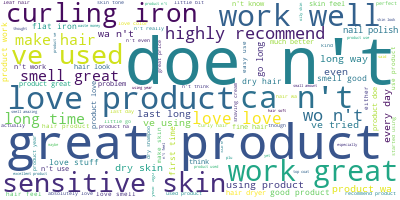

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = "white", max_words = 100)

wordcloud.generate(" ".join([word for text in df['clean_review'] for word in text]))
wordcloud.to_image()

In [ ]:
word_count_two = dict()

for text in lux['clean_summary']:
  for word in text:
    if word in word_count_two: 
      word_count_two[word] += 1
    else:
      word_count_two[word] = 1

sorted(word_count_two.items(),key = lambda x: x[1],reverse=True)[:10]

[('star', 159912),
 ('five', 118788),
 ('great', 62145),
 ('product', 52503),
 ('love', 47108),
 ('good', 27042),
 ('hair', 23746),
 ('best', 23122),
 ('work', 19817),
 ('four', 16221)]

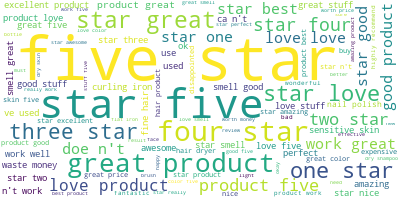

In [ ]:
wordcloud.generate(" ".join([word for text in lux['clean_summary'] for word in text]))
wordcloud.to_image()

# LDA

In [ ]:
!pip install -qq pyLDAvis

     |████████████████████████████████| 1.6MB 6.8MB/s 


In [ ]:
!pip install -qq gensim

In [ ]:
from gensim.corpora.dictionary import Dictionary 
from gensim.models import LdaMulticore
import pyLDAvis.gensim

In [ ]:
dictionary = Dictionary(lux['clean_review'])

In [ ]:
# filter out low-frequency / high-frequency, also limit the vocabulary to max 1000 words
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in lux['clean_review']]

In [ ]:
#Train the model
lda = LdaMulticore(corpus, id2word=dictionary, num_topics=4, workers=3, passes=1)

In [ ]:
# Inspect the topics
lda.print_topics(0)

[(0,
  '0.042*"color" + 0.022*"love" + 0.017*"n\'t" + 0.017*"look" + 0.014*"\'s" + 0.014*"wa" + 0.012*"great" + 0.011*"nail" + 0.011*"lip" + 0.011*"doe"'),
 (1,
  '0.045*"smell" + 0.044*"product" + 0.044*"love" + 0.037*"great" + 0.023*"scent" + 0.022*"good" + 0.016*"\'s" + 0.014*"wa" + 0.013*"nice" + 0.013*"n\'t"'),
 (3,
  '0.040*"skin" + 0.027*"product" + 0.023*"n\'t" + 0.018*"use" + 0.016*"face" + 0.014*"wa" + 0.013*"using" + 0.012*"\'s" + 0.011*"doe" + 0.011*"feel"'),
 (2,
  '0.080*"hair" + 0.029*"product" + 0.024*"wa" + 0.020*"n\'t" + 0.014*"use" + 0.012*"work" + 0.011*"shampoo" + 0.011*"one" + 0.010*"doe" + 0.009*"love"')]

In [ ]:
# Visualizing
lda_vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary) 
pyLDAvis.display(lda_vis)

In [ ]:
lda[corpus][0]

[(0, 0.01624927), (1, 0.26350155), (2, 0.016715556), (3, 0.7035336)]

In [ ]:
sorted(lda[corpus][0])[0][0]

0

In [ ]:
lux['topic'] = [sorted(lda[corpus][text])[0][0] for text in range(len(lux['clean_review']))]

In [ ]:
lux.topic.value_counts()

0    509999
1     36431
2     18981
3      9217
Name: topic, dtype: int64

# Word embedding & Topic modelling (Spacy)

To use word embeddings, I have two primary options:

	• Use pre-trained models that I can download online (example: Spacy)
	• Train custom models using your own data and the Word2Vec (or another) algorithm (example: Gensim).

In [ ]:
#Using Spacy's pre-trained model (english version):
!python -m spacy download en_core_web_md -qq

#The code snippet above installs the larger-than-standard en_core_web_md library, 
#which includes 20k unique vectors with 300 dimensions.
#source: https://spacy.io/models/en

     |████████████████████████████████| 96.4MB 1.1MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import en_core_web_md
nlp2 = en_core_web_md.load(disable=["tagger", "parser", "ner"])

In [ ]:
tokens

In [ ]:
spacy_embedding_dic = {}

for l in tokens:
    for word in l:
        spacy_embedding_dic[word] = nlp2(word).vector

In [ ]:
spacy_embedding_dic['fl']

In [ ]:
s_embedding = pd.DataFrame.from_dict(spacy_embedding_dic)
s_embedding.head()

,hand,dispenser,cream,year,people,crack,lot,lotion,water,scent,money,skin,non-,thing,work,wash,moisturizer,gardner,day,healthcare,care,life,desk,therapy,discomfort,product,smell,man,woman,fruity,perfume,way,wife,soap,application,packaging,review,time,nail,pump,...,wprse,formulae,spf-,fragranc,4hs,subtke,proudivts,sugarfree,zealot,madd,1i,faming,debri,niacinmide,lotionit,forgetting,lovely,oramhe,perfume&nbsp;<a,durastic,chistill,instructionsjust,rightworthless,swank,carcter,hugger,assemblage,parfrum,concleaer,apf,ceramicide,seant,occasions,devolumizing,stylability,gotto,-update,food(you,loprox,aesthetics
0,-0.532930,-0.014736,-0.11062,-0.110060,-0.19686,-0.040324,-0.333550,-0.397890,-0.036665,0.15625,-0.750730,-0.19136,0.0,-0.151060,-0.000030,-0.196820,-0.238740,-0.658970,-0.037723,-0.175470,-0.175700,0.093590,-0.221970,0.100530,-0.452900,-0.479580,-0.066395,-0.173100,0.025567,-0.507110,0.038622,-0.14031,-0.053776,-0.22263,0.089798,-0.37755,-0.52103,0.172430,0.012847,-0.135770,...,0.0,-0.45571,0.0,0.0,-0.202400,0.0,0.0,-0.176530,-0.36608,-0.099878,-0.025202,-0.267480,0.110220,0.0,0.0,0.256880,0.32202,0.0,0.0,0.0,0.0,0.0,0.0,0.065841,0.0,0.40389,-0.075805,0.0,0.0,0.15133,0.0,0.0,0.088235,0.0,0.0,0.092588,0.0,0.0,0.0,0.097821
1,-0.201220,0.486990,-0.10210,0.196960,0.11579,-0.389640,0.496110,-0.579400,0.201060,0.46364,0.081650,-0.32528,0.0,0.121380,0.084473,0.043767,-0.618110,0.286340,0.278650,-0.170950,-0.061982,0.508770,-0.422700,0.443810,0.008826,0.456380,0.087068,0.206630,0.278850,0.081616,0.322740,0.21403,0.052681,-0.18514,-0.087491,0.14666,0.15400,0.275020,-0.345250,0.419700,...,0.0,0.14962,0.0,0.0,-0.495230,0.0,0.0,-0.536690,-0.76064,-0.579120,0.801080,-0.246900,-0.341330,0.0,0.0,-0.234770,0.42380,0.0,0.0,0.0,0.0,0.0,0.0,-0.127700,0.0,-0.21008,0.079757,0.0,0.0,-0.21194,0.0,0.0,-0.117390,0.0,0.0,-0.275620,0.0,0.0,0.0,0.198950
2,-0.037079,-0.440700,0.33973,0.177120,-0.41091,-0.522750,-0.278580,-0.057208,0.285100,-0.55181,0.090288,-0.41742,0.0,-0.092942,-0.128650,0.101440,0.091695,-0.005828,0.113530,0.318590,-0.085616,0.011249,-0.021275,-0.057088,-0.508760,-0.045291,-0.532480,0.016543,-0.169920,-0.103460,-0.438090,-0.35163,-0.024571,0.02124,-0.148460,0.12503,-0.20265,0.050863,-0.146130,0.279760,...,0.0,-0.50013,0.0,0.0,0.640060,0.0,0.0,0.335320,0.21299,0.134810,0.354180,0.205190,-0.316970,0.0,0.0,-0.382690,-0.62690,0.0,0.0,0.0,0.0,0.0,0.0,-0.019348,0.0,-0.17013,-0.180390,0.0,0.0,-0.18116,0.0,0.0,0.015041,0.0,0.0,-0.190800,0.0,0.0,0.0,0.412880
3,-0.060405,-0.190980,-0.16915,-0.283180,-0.46998,0.401270,-0.205060,-0.218620,-0.432460,-0.42569,-0.347190,0.41843,0.0,-0.306910,-0.307770,-0.599840,0.079387,-0.642720,-0.145210,-0.044865,-0.384020,-0.074822,0.206380,0.190080,0.440400,-0.193270,-0.425780,-0.310260,0.273480,0.479790,-0.470910,0.08673,0.024504,-0.46381,-0.277210,-0.43476,-0.17640,-0.196050,-0.277180,-0.326870,...,0.0,-0.40349,0.0,0.0,0.079196,0.0,0.0,-0.097851,0.40079,-0.085245,0.047935,0.107370,-0.071772,0.0,0.0,-0.068662,0.14158,0.0,0.0,0.0,0.0,0.0,0.0,-0.100810,0.0,0.20967,-0.069810,0.0,0.0,0.24265,0.0,0.0,-0.227820,0.0,0.0,-0.179780,0.0,0.0,0.0,-0.108790
4,0.263060,-0.058423,-0.19102,0.032341,-0.29972,-0.107690,0.060868,-0.359630,-0.395450,-0.15564,-0.605980,-0.38130,0.0,-0.075544,-0.280690,0.007881,-0.592120,0.606190,-0.093572,-0.044062,-0.443430,-0.212770,0.030020,-0.675380,-0.209510,-0.138060,-0.402200,0.019719,-0.054906,0.370040,0.210770,0.10860,0.328050,-0.53721,-0.262410,0.11064,-0.17598,-0.238520,0.081268,-0.081313,...,0.0,-0.39406,0.0,0.0,0.291310,0.0,0.0,0.432340,-0.30417,0.322110,0.264890,0.093295,-0.377610,0.0,0.0,-0.180690,-0.30635,0.0,0.0,0.0,0.0,0.0,0.0,0.293810,0.0,0.49947,0.163400,0.0,0.0,0.34967,0.0,0.0,0.229540,0.0,0.0,0.022692,0.0,0.0,0.0,-0.002842


In [ ]:
import umap

In [ ]:
reducer = umap.UMAP()

In [ ]:
umap_spacy = reducer.fit_transform(s_embedding)
umap_spacy.shape

(300, 2)

In [ ]:
mapper = umap.UMAP().fit(s_embedding)

In [ ]:
from sklearn.cluster import KMeans

# and instantiate it where we need to specify that we want it to create 3 clusters (three types of penguins)
clusterer = KMeans(n_clusters=4)
clusterer.fit(s_embedding) #we only fit here, since no data needs to be transformed

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


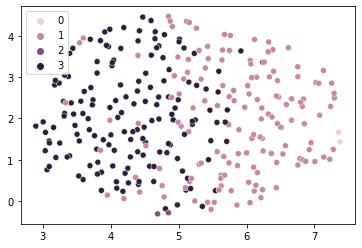

In [ ]:
sns.scatterplot(umap_spacy[:,0], umap_spacy[:,1], hue = clusterer.labels_)